In [2]:
from Foresight import *
import numpy as np
from numpy.random import rand
import pytest
# from Foresight.preprocessing import slice_series, universe_select
import torch
from torch.optim import Adam
torch.nn.Module.dump_patches = True

Epoch: 0 Train: 40.09979 Val: 12.49365  Time: 0.203  Best Val: 12.49365


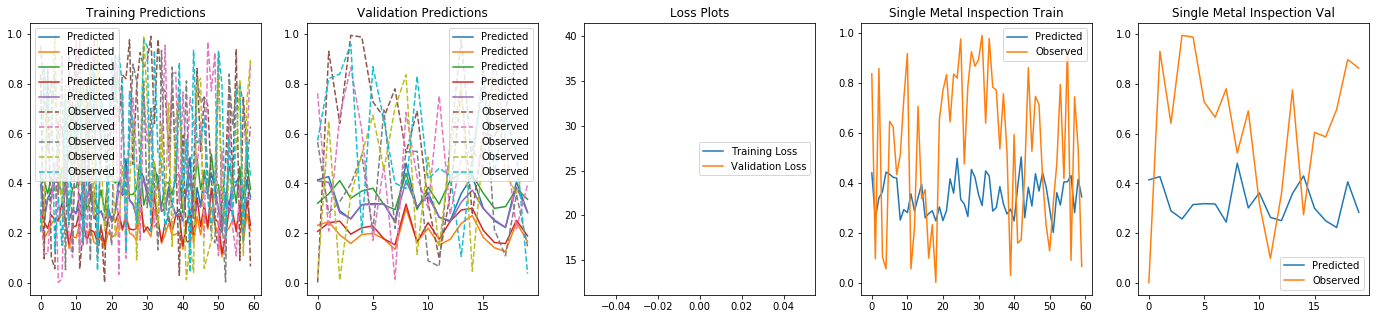

In [9]:
"""Check that an output is obtained for MTL model"""
data_X = rand(100, 132, 7)
data_y = rand(100, 5)
device = 'cpu'

model = model_load("Test_MTL_CPU", device, path="Results/Pths/MTL/Autoregressive/")
model.device = device
model.to(device)

learning = DeepLearning(model=model,
                        data_X=data_X,
                        data_y=data_y,
                        optimiser=Adam(model.parameters()),
                        n_epochs=1,
                       debug=False)


learning.train_val_test()
learning.create_data_loaders()
learning.training_wrapper()
assert(learning.best_val_score < np.inf)